Interactive plot

In [9]:
import torch

from examples.dataloader_16_ag import DataLoader
from examples.SIR_no_age_groups.main import data
from src.model import r0, epidemic_model

In [10]:
#data = DataLoader()
r0gen = r0.R0Generator(data)
model = epidemic_model.EpidemicModel(data)

susc = torch.ones(data.n_age).to(data.device)
data.model_params.update({"susc": susc})

In [11]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [12]:
def create_interactive_plot():
    t_eval = torch.linspace(1, 1200, 1200).to(data.device)
    susceptibles = model.get_initial_values()[model.idx("s_0")]

    def update(r0, alpha, gamma):
        beta = r0 / r0gen.get_eig_val(contact_mtx=data.cm,
                                      susceptibles=susceptibles.reshape(1, -1),
                                      population=data.age_data.flatten())
        data.model_params["beta"] = beta
        data.model_params["alpha"] = alpha
        data.model_params["gamma"] = gamma
        model.initialize_matrices()

        sol = model.get_solution(y0=model.get_initial_values()[None, :], t_eval=t_eval[None, :]).ys[0, :, :]
        mask = torch.cat((torch.full((100,), True),
                          sol[100:, model.idx('i_0')].sum(axis=1) > 1))
        sol = sol[mask, :]
        t = t_eval[mask]
        for idx, comp in enumerate(["s", "e", "i", "r"]):
            comp_sol = model.aggregate_by_age(sol, comp)
            plt.plot(t, comp_sol, label=comp.upper(), linewidth=2)
        plt.legend()
        plt.xlabel = "Napok"
        plt.ylabel = "Egyedszám"
        plt.show()
    r0_slider = widgets.FloatSlider(value=2,
                               min=1 ,
                               max=10,
                               step=0.1,
                               description="R0:")
    alpha_slider = widgets.FloatSlider(value=0.5,
                                     min=0.05,
                                     max=1,
                                     step=0.05,
                                     description="Alpha: ")
    gamma_slider = widgets.FloatSlider(value=0.5,
                                     min=0.05,
                                     max=1,
                                     step=0.05,
                                     description="Gamma: ")
    # Hozzáadás az ábrához
    widgets.interact(update, r0=r0_slider, alpha=alpha_slider, gamma=gamma_slider)

In [14]:
create_interactive_plot()

interactive(children=(FloatSlider(value=2.0, description='R0:', max=10.0, min=1.0), FloatSlider(value=0.5, des…

Sensitivity analysis

In [6]:
from examples.vaccinated_sensitivity.simulation_vacc import SimulationVaccinated

In [7]:
def run_vacc_sim():
    data = DataLoader()
    simulation = SimulationVaccinated(data=data)
    simulation.run_sampling()
    simulation.calculate_prcc_for_simulations()
    simulation.calculate_all_p_values()
    simulation.plot_prcc_tornado_with_p_values()
    simulation.plot_optimal_vaccine_distributions()


 Batches solved, time limit: 500, samples left: 2000:   0%|          | 0/4 [00:00<?, ?it/s]


 Simulation for 2000 samples (1.0-1.8-i_max)
Batch size: 500




 Batches solved, time limit: 500, samples left: 2000:  25%|██▌       | 1/4 [00:04<00:14,  4.94s/it]
 Batches solved, time limit: 500, samples left: 2000:  50%|█████     | 2/4 [00:09<00:09,  4.92s/it]
 Batches solved, time limit: 500, samples left: 2000:  75%|███████▌  | 3/4 [00:14<00:04,  4.76s/it]
                                                                                                    
                                                                                         
                                                                                         



 Elapsed time:  19.076213836669922


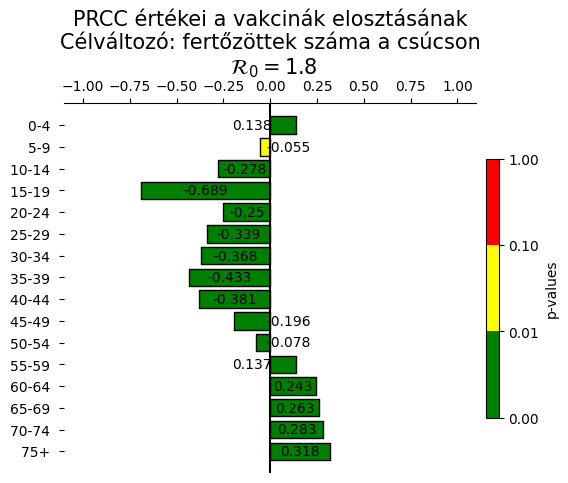

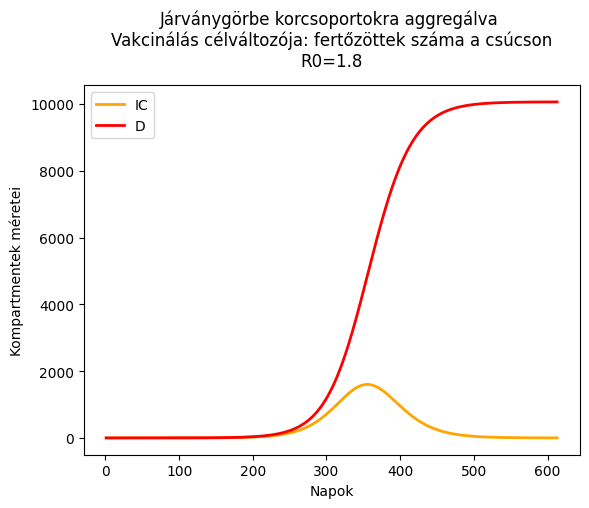

In [8]:
run_vacc_sim()